In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [4]:
d = pd.read_csv('insurance.csv')

In [5]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
d.shape

(1338, 7)

In [7]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
dX=d.drop(['sex','smoker','region'],axis=1)

In [11]:
#target variable
d['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
y= d['sex']
y

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


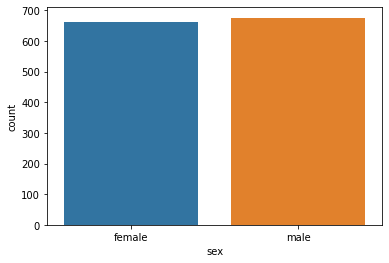

In [13]:
import seaborn
seaborn.countplot(d['sex'])

In [16]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=4)
test.fit(dX,y)
pd.DataFrame(test.scores_)

,0
0,0.581369
1,2.878970
2,0.393659
3,4.399702


In [21]:
X=d[['age', 'bmi', 'children', 'charges']]

In [22]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=31)

In [23]:
#Train the model using the training sets
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=31)

In [24]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

KNeighborsClassifier(n_neighbors=31)

In [25]:
pred=knn.predict(X)
pred

array(['female', 'male', 'male', ..., 'male', 'male', 'female'],
      dtype=object)

In [26]:
#Predict the response for test dataset
knn.predict(X).shape

(1338,)

In [27]:
knn.score(X,y)

0.6001494768310912

In [28]:
#Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [29]:
accuracy_score(y,pred)

0.6001494768310912

In [30]:
confusion_matrix(y,pred)

array([[398, 264],
       [271, 405]])

Text(0.5, 257.44, 'Predicted label')

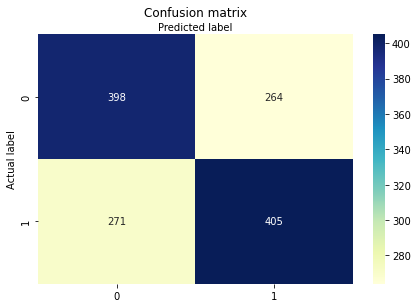

In [31]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

      female       0.59      0.60      0.60       662
        male       0.61      0.60      0.60       676

    accuracy                           0.60      1338
   macro avg       0.60      0.60      0.60      1338
weighted avg       0.60      0.60      0.60      1338

